#### Imports

In [1]:
import wrangle
import explore
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:20,.2f}'.format

from math import sqrt
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression, SelectKBest, RFE 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

In [2]:
# Call in Dataframe
df = wrangle.get_zillow_data(cached=False)
# Clean Data with Outliers Removed
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.clean_zillow(df) 
# Clean Data With Outliers Scaled
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.model_zillow(X_train, X_validate, X_test)

In [3]:
# Test Split
X_train.shape, y_train.shape, X_validate.shape, y_validate.shape, X_test.shape, y_test.shape

((43332, 15), (43332, 1), (18572, 15), (18572, 1), (15476, 15), (15476, 1))

In [4]:
# Test Scale
X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

((43332, 15), (18572, 15), (15476, 15))

In [5]:
X_train.head()

,bathroomcnt,calculatedfinishedsquarefeet,latitude,longitude,heatingorsystemdesc,propertylandusedesc,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,LA,Orange,Ventura
20345,2,1248,33.85,-117.96,5,10,62,0.01,0.17,55.15,14.38,1.50,0,1,0
29710,3,3100,34.19,-119.22,5,10,11,0.02,0.14,117.45,143.47,0.86,0,0,1
17528,4,2881,34.17,-118.63,1,10,65,0.01,0.47,157.73,14.80,0.75,1,0,0
54354,2,1682,33.78,-118.37,1,10,60,0.02,0.22,30.89,6.39,2.00,1,0,0
4813,1,852,33.98,-118.12,2,10,76,0.02,0.18,102.93,34.00,2.00,1,0,0


In [6]:
X_train_scaled.head()

,bathroomcnt,calculatedfinishedsquarefeet,latitude,longitude,heatingorsystemdesc,propertylandusedesc,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,LA,Orange,Ventura
20345,0.11,0.05,0.35,0.79,0.62,0.83,0.32,0.02,0.00,0.02,0.00,0.12,0.00,1.00,0.00
29710,0.17,0.14,0.57,0.13,0.62,0.83,0.05,0.02,0.00,0.05,0.05,0.07,0.00,0.00,1.00
17528,0.22,0.13,0.57,0.44,0.12,0.83,0.33,0.01,0.00,0.07,0.01,0.06,1.00,0.00,0.00
54354,0.11,0.07,0.30,0.57,0.12,0.83,0.31,0.02,0.00,0.01,0.00,0.15,1.00,0.00,0.00
4813,0.06,0.03,0.44,0.71,0.25,0.83,0.39,0.02,0.00,0.04,0.01,0.15,1.00,0.00,0.00


### Exploration:

**Target = Logerror** 


-A number that represents a ratio that is derived from two prior distributions - the real price distribution of homes and then Zillow's existing model of that distribution


#### New Dataframes Per County

In [7]:
# LA County
X_train_scaled_LA = X_train_scaled[X_train_scaled.LA==1]
X_train_scaled_LA.shape

(28323, 15)

In [8]:
# Ventura County
X_train_scaled_V = X_train_scaled[X_train_scaled.Ventura==1]
X_train_scaled_V.shape

(3475, 15)

In [9]:
# Orange County
X_train_scaled_O = X_train_scaled[X_train_scaled.Orange==1]
X_train_scaled_O.shape

(11534, 15)

#### LA County

In [10]:
X_train_scaled_LA.head()

,bathroomcnt,calculatedfinishedsquarefeet,latitude,longitude,heatingorsystemdesc,propertylandusedesc,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,LA,Orange,Ventura
17528,0.22,0.13,0.57,0.44,0.12,0.83,0.33,0.01,0.00,0.07,0.01,0.06,1.00,0.00,0.00
54354,0.11,0.07,0.30,0.57,0.12,0.83,0.31,0.02,0.00,0.01,0.00,0.15,1.00,0.00,0.00
4813,0.06,0.03,0.44,0.71,0.25,0.83,0.39,0.02,0.00,0.04,0.01,0.15,1.00,0.00,0.00
65772,0.11,0.06,0.33,0.62,0.12,0.83,0.25,0.02,0.00,0.03,0.02,0.12,1.00,0.00,0.00
19019,0.06,0.06,0.48,0.50,0.12,0.83,0.36,0.01,0.00,0.11,0.08,0.23,1.00,0.00,0.00


#### Inital Thoughts:

- From my inital investigation on regression project I know that room count has a large affect on taxrate and housing price.  I was unable to create a derived feature last go round so I want to test the affect of this feature now.     

- I want to examine how usefull our created feature of bedbathratio is in predicting logerror in LA County.  I chose LA County because it has the largest number of datapoints.  I want to cluster on bedbathratio, bathroomcnt, and caluculaedfinishedsquarefeet.   

#### LA-County (Room Clusters)

     k                  sse
0    2               126.89
1    3                91.09
2    4                65.80
3    5                55.38
4    6                46.76
5    7                38.89
6    8                33.67
7    9                30.39
8   10                27.13
9   11                24.04
10  12                21.12
11  13                19.46
12  14                18.21
13  15                16.84
14  16                16.05
15  17                15.09
16  18                14.25
17  19                13.34


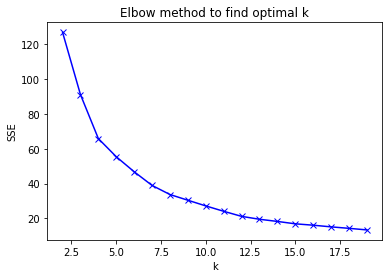

In [11]:
# #Reasign for formula to work correctly
# X_train_scaled = X_train_scaled_LA.copy()

cluster_vars = ['bathroomcnt', 'bed_bath_ratio', 'calculatedfinishedsquarefeet']
explore.elbow_plot(X_train_scaled_LA, cluster_vars)